# MLEnd Hums and Whistles

<img src='https://c.tenor.com/R-7s6Xm_VQYAAAAC/mickey-mouse-music.gif'> 

## Context

Music is part of our lives. <br>

Many of us can't stop listening to music and spend a considerable amount of time trying to decide what to listen to next or what is worse, looking for that song whose title we have forgotten! How do we go about finding that song we want to listen to, but have forgotten?  <br>

We can try to remember a fragment of the lyrics and simply use a text-based search engine. What if we don't recall the lyrics or they are in a language we don't even speak? Well, we can ask for help: we hum to the song and hope that someone will recognize it - no matter how poorly we do it. Think about it. It is amazing that we can recognize a song when we listen to it. But isn't it even more amazing that we can recognize it when someone else is humming or whistling to it? Wouldn't it be great to have an audio-based search engine that did this for us?  <br>

## Data Overview

The dataset can be found [here](https://www.kaggle.com/datasets/jesusrequena/mlend-hums-and-whistles), it contains Hums and Whistles with total 834 audio files for songs : [Frozen](https://youtu.be/L0MK7qz13bU?t=126), 
[Hakuna](https://youtu.be/MBIWFTXQbi4?t=79), 
[Mamma](https://youtu.be/unfzfe8f9NI?t=50), 
[Panther](https://youtu.be/lp6z3s1Gig0?t=10), 
[Harry Potter](https://youtu.be/Htaj3o3JD8I?t=0), 
[Rain](https://youtu.be/D1ZYhVpdXbQ?t=65), 
[Showman](https://youtu.be/CjxugyZCfuw?t=115) and 
[StarWars](https://youtu.be/s3SZ5sIMY6o?t=9). <br>

The MLEnd datasets have been created by students at the School of Electronic Engineering and Computer Science, Queen Mary University of London. <br>

## Problem Statement

-  The task is to classify the song whether is whistle or hum and which song it is. A machine learning pipeline can be made that takes an  audio segment as an input and predicts its song label. <br>


## Exploring data

Let's see what we got. <br>


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys, re, pickle, glob
import urllib.request
import zipfile
from os.path import exists

import IPython.display as ipd
from tqdm import tqdm
import librosa
import folium
import warnings

### Files in Dataset

In [27]:
# Importing the files
import os, sys, re, pickle, glob

for i in os.listdir(os.getcwd()+'/dataset'):
    print(i)

MLEndHWD_Audio_Attributes.csv
MLEndHWD_Frozen_Audio_Files
MLEndHWD_Hakuna_Audio_Files
MLEndHWD_Interpreter_Demographics.csv
MLEndHWD_Mamma_Audio_Files
MLEndHWD_Panther_Audio_Files
MLEndHWD_Potter_Audio_Files
MLEndHWD_Rain_Audio_Files
MLEndHWD_Showman_Audio_Files
MLEndHWD_StarWars_Audio_Files


- we have two csv files which contains attributes about dataset.<br>
MLEndHWD_Audio_Attributes.csv<br>
MLEndHWD_Interpreter_Demographics.csv<br>

In [28]:
# importing MLEndHWD_Audio_Attributes.csv
audio_attr = pd.read_csv('dataset/MLEndHWD_Audio_Attributes.csv')
audio_attr

,Public filename,Interpreter,Song,Interpretation
0,0000.wav,216,Potter,Hum
1,0001.wav,100,Potter,Hum
2,0002.wav,177,Potter,Hum
3,0003.wav,159,Potter,Hum
4,0004.wav,160,Potter,Whistle
...,...,...,...,...
6606,6606.wav,204,Frozen,Hum
6607,6607.wav,94,Frozen,Hum
6608,6608.wav,164,Frozen,Hum
6609,6609.wav,125,Frozen,Hum


In [29]:
print("Number of missing values in Audio Attributes file :",audio_attr.isna().sum().max(),'\n')
audio_attr.info()

Number of missing values in Audio Attributes file : 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6611 entries, 0 to 6610
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Public filename  6611 non-null   object
 1   Interpreter      6611 non-null   int64 
 2   Song             6611 non-null   object
 3   Interpretation   6611 non-null   object
dtypes: int64(1), object(3)
memory usage: 206.7+ KB


- Let's see the distribution of Interpretation, if dataset is imbalanced

<AxesSubplot:ylabel='None'>

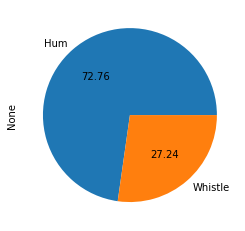

In [30]:
audio_attr.groupby('Interpretation').size().plot(kind='pie', autopct='%.2f')

So, Interpretation category is highly imbalanced in the data.

- Let's check for the songs

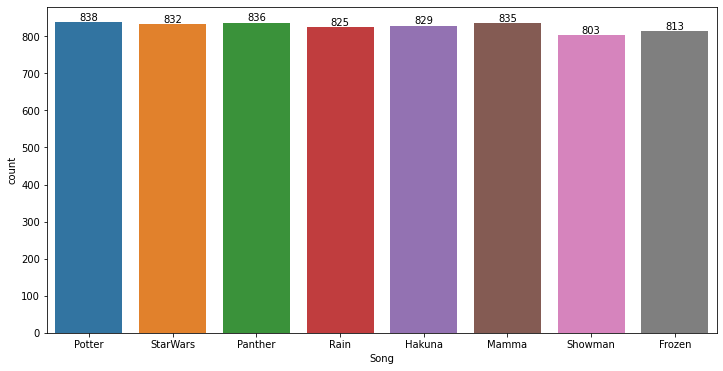

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# count plot on single categorical variable
fig = plt.figure(figsize=(12,6))
ax = sns.countplot(x ='Song', data = audio_attr)

ax.bar_label(ax.containers[0])
plt.show()

Apparently, our dataset is very slightly imbalanced, we have less entries for 'Showman' and 'Frozen'.

In [32]:
# checking the exact difference in song counts
print("Count of Potter   songs in % :",round(sum(audio_attr['Song']=='Potter')/len(audio_attr),3))
print("Count of StarWars songs in % :",round(sum(audio_attr['Song']=='StarWars')/len(audio_attr),3))
print("Count of Panther  songs in % :",round(sum(audio_attr['Song']=='Panther')/len(audio_attr),3))
print("Count of Rain     songs in % :",round(sum(audio_attr['Song']=='Rain')/len(audio_attr),3))
print("Count of Hakuna   songs in % :",round(sum(audio_attr['Song']=='Hakuna')/len(audio_attr),3))
print("Count of Mamma    songs in % :",round(sum(audio_attr['Song']=='Mamma')/len(audio_attr),3))
print("Count of Showman  songs in % :",round(sum(audio_attr['Song']=='Showman')/len(audio_attr),3))
print("Count of Frozen   songs in % :",round(sum(audio_attr['Song']=='Frozen')/len(audio_attr),3))

Count of Potter   songs in % : 0.127
Count of StarWars songs in % : 0.126
Count of Panther  songs in % : 0.126
Count of Rain     songs in % : 0.125
Count of Hakuna   songs in % : 0.125
Count of Mamma    songs in % : 0.126
Count of Showman  songs in % : 0.121
Count of Frozen   songs in % : 0.123


**So, song count is very slightly imbalanced, I don't think it will affect the accuracy of our classifiers.**<br>

Let's see content of MLEndHWD_Audio_Attributes.csv <br>

In [33]:
# importing MLEndHWD_Audio_Attributes.csv
interpreter = pd.read_csv('dataset/MLEndHWD_Interpreter_Demographics.csv')
interpreter.head()

,Interpreter,Language1,Language2,Nationality,Coordinates
0,0,Akan,English,Ghanaian,"(5.6037, -0.1870)"
1,1,Portuguese,English,Brazilian,"(-16.6869, -49.2648)"
2,2,Urdu,English,Indian,"(49,-0.2)"
3,3,Malayalam,Hindi,Indian,"(51.5912,0.1046)"
4,4,Telugu,Hindi,Indian,"(51.52, -0.04)"


In [34]:
print("Number of missing values in interpreter file :",interpreter.isna().sum().max(),'\n')
interpreter.info()

Number of missing values in interpreter file : 70 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Interpreter  236 non-null    int64 
 1   Language1    200 non-null    object
 2   Language2    166 non-null    object
 3   Nationality  200 non-null    object
 4   Coordinates  200 non-null    object
dtypes: int64(1), object(4)
memory usage: 9.3+ KB


### Language

In [35]:
lan1 = interpreter['Language1']
lan2 = interpreter['Language2']
all_lans = pd.concat([lan1, lan2])

print("There are "+str(lan1.dropna().nunique())+" unique 1st languages:")
print(lan1.dropna().unique())

print("\n")
print("There are "+str(lan2.dropna().nunique())+" unique 2nd languages:")
print(lan2.dropna().unique())

print("\n")
print("There are "+str(all_lans.dropna().nunique())+" unique languages:")
print(all_lans.dropna().unique())

There are 31 unique 1st languages:
['Akan' 'Portuguese' 'Urdu' 'Malayalam' 'Telugu' 'Chinese' 'Tamil' 'Hindi'
 'English' 'Indonesian' 'Kannada' 'Bengali' 'Dutch' 'Gujarati' 'Arabic'
 'Punjabi' 'Turkish' 'Greek' 'German' 'Kazakh' 'Russian' 'Spanish'
 'Marathi' 'Sinhala' 'Persian' 'Lithuanian' 'Bulgarian' 'Vietnamese'
 'Icelandic' 'Shona' 'Hungarian']


There are 27 unique 2nd languages:
['English' 'Hindi' 'German' 'Marathi' 'Malayalam' 'Italian' 'Filipino'
 'Urdu' 'French' 'Spanish' 'Arabic' 'Yoruba' 'Bengali' 'Cantonese' 'Tamil'
 'Telugu' 'Gujarati' 'Turkish' 'Russian' 'Somali' 'Welsh' 'Romanian'
 'Kannada' 'Punjabi' 'Sadri' 'Dhivehi' 'Patois']


There are 42 unique languages:
['Akan' 'Portuguese' 'Urdu' 'Malayalam' 'Telugu' 'Chinese' 'Tamil' 'Hindi'
 'English' 'Indonesian' 'Kannada' 'Bengali' 'Dutch' 'Gujarati' 'Arabic'
 'Punjabi' 'Turkish' 'Greek' 'German' 'Kazakh' 'Russian' 'Spanish'
 'Marathi' 'Sinhala' 'Persian' 'Lithuanian' 'Bulgarian' 'Vietnamese'
 'Icelandic' 'Shona' 'Hungarian

In the following cell, we create a pandas dataframe that associate each language to the language family that it belongs to:

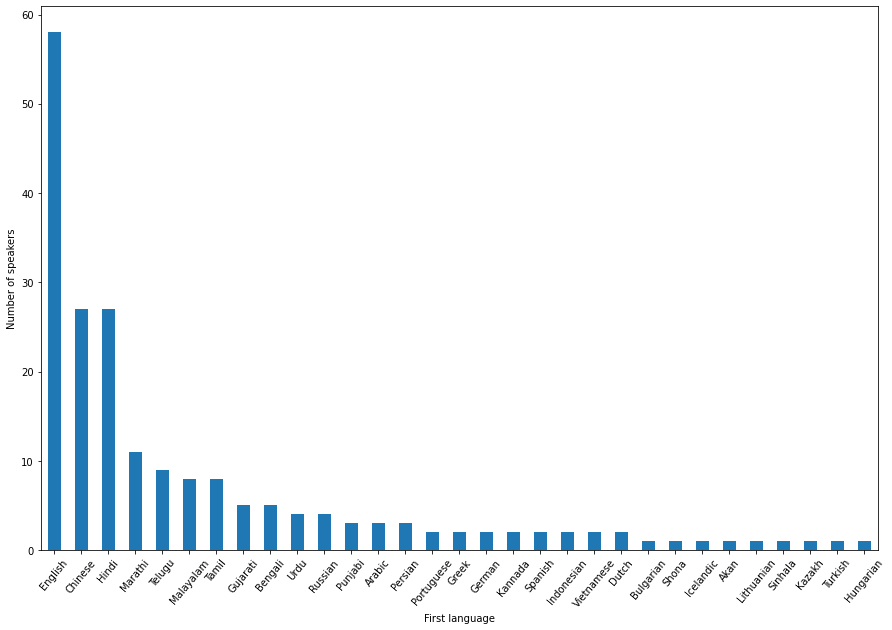

In [36]:
plt.figure(figsize=(15,10))
lan1.dropna().value_counts().plot.bar()
plt.xticks(rotation=50)

plt.xlabel("First language")
plt.ylabel("Number of speakers")
plt.show()


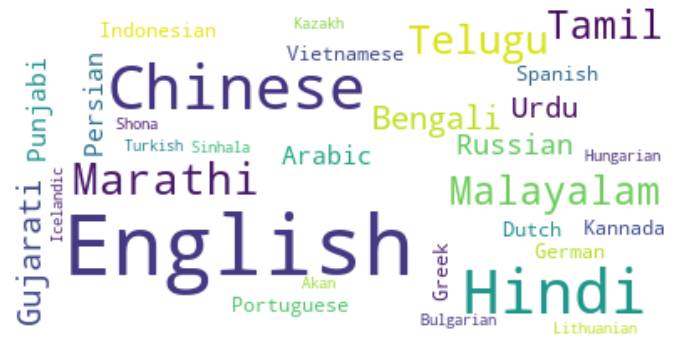

In [37]:
from wordcloud import WordCloud 

plt.figure(figsize=(12,18))
wordcloud = WordCloud(max_font_size=50, background_color="white").generate(lan1.dropna().to_string())
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Locations

Which places do our speakers feel most identified with? <br>

In [38]:
location = interpreter['Coordinates'].dropna()

Let's plot those places on a map:

In [39]:
import folium

m = folium.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=2) # "cartodb positron"
for i in range(0,len(location)):
   folium.Marker(
       location=[eval(location.iloc[i])[0], eval(location.iloc[i])[1]],
   ).add_to(m)
m

let's import audio files.

In [40]:
# # # Automate dataframe creation for all songs
all_songs = ['Frozen','Hakuna'] #,'Mamma','Panther','Potter','Rain','Showman','StarWars']
# d = {}

# for song in all_songs:
#     d[song + '_Audio'] = 'dataset\\MLEndHWD_'+song+'_Audio_Files/*.wav' 
#     print("\n Creating dataframe for ",song)
# #     Hakuna_Audio = 'dataset\\MLEndHWD_Hakuna_Audio_Files/*.wav' 

#     d[song + '_files'] = glob.glob(song + '_Audio')
# #     print(song+_files[35])                            # printing a random filename

#     d[song+'_table'] = [] 
#     for file in (song+'_files'):
#         print(file.split('_'))
# #         song_name = file.split('_')[1]
# #         file_id = file.split('\\')[2]
# #         song+'_table'.append([file_id, song_name])
# #     d[song+'_df'] = pd.DataFrame(song+'_table',columns=['file_id','song'])
# #     d[song+'_df'].head(2)

In [41]:
# For next song "Frozen"
Frozen_Audio = 'dataset\\MLEndHWD_Frozen_Audio_Files/*.wav' 
Frozen_files = glob.glob(Frozen_Audio)
print(Frozen_files[35])            # printing a random filename

dataset\MLEndHWD_Frozen_Audio_Files\5833.wav


In [42]:
Frozen_table = [] 
for file in Frozen_files:
    song_name = file.split('_')[1]
    file_id = file.split('\\')[2]

    Frozen_table.append([file_id, song_name])
Frozen_df = pd.DataFrame(Frozen_table,columns=['file_id','song']).set_index('file_id')
Frozen_df

,song
file_id,
5798.wav,Frozen
5799.wav,Frozen
5800.wav,Frozen
5801.wav,Frozen
5802.wav,Frozen
...,...
6606.wav,Frozen
6607.wav,Frozen
6608.wav,Frozen


In [43]:
# This function will be uesd to calculate pitch
def getPitch(x,fs,winLen=0.02):
  #winLen = 0.02 
  p = winLen*fs
  frame_length = int(2**int(p-1).bit_length())
  hop_length = frame_length//2
  f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=450, sr=fs,
                                                 frame_length=frame_length,hop_length=hop_length)
  return f0,voiced_flag

In [44]:
#Function to extract feature from audio files using Librosa package
def getXy(files,labels_file, scale_audio=False, onlySingleDigit=False):
    X,y =[],[]

    for file in tqdm(files):
        fileID = file.split('_')[1]
#         file_name = file.split('\\')[-1]

        if labels_file.loc[file_id]['song'] == 'Frozen':
            yi = 'Frozen'
            
        elif labels_file.loc[file_id]['song'] == 'Hakuna':
            yi = 'Hakuna'
            
        elif labels_file.loc[file_id]['song'] == 'Mamma':
            yi = 'Mamma'
            
        elif labels_file.loc[file_id]['song'] == 'Panther':
            yi = 'Panther'
        
        elif labels_file.loc[file_id]['song'] == 'Potter':
            yi = 'Harry Potter'
            
        elif labels_file.loc[file_id]['song'] == 'Rain':
            yi = 'Rain'
            
        elif labels_file.loc[file_id]['song'] == 'Showman':
            yi = 'Showman'
            
        elif labels_file.loc[file_id]['song'] == 'StarWars':
            yi = 'StarWars'
        else :
            # Added third category just incase, if the model got the wrong audio file
            yi = 'invalid input song_name in '+ str(labels_file) 
            
                            
        fs = None # if None, fs would be 22050
        x, fs = librosa.load(file,sr=fs)
        if scale_audio: x = x/np.max(np.abs(x))
        f0, voiced_flag = getPitch(x,fs,winLen=0.02)
    
        power = np.sum(x**2)/len(x)
        pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0
        pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0
        voiced_fr = np.mean(voiced_flag)

        sr=44100
        magnitudes = np.abs(np.fft.rfft(x)) # magnitudes of positive frequencies
        length = len(x)
        freqs = np.abs(np.fft.fftfreq(length, 1.0/sr)[:length//2+1]) # positive frequencies
        spectral_centroid = np.sum(magnitudes*freqs) / np.sum(magnitudes)
    
        mfccs = librosa.feature.mfcc(x, sr=fs).shape[1]
        spectral_cent = librosa.feature.spectral_centroid(y = x, sr = sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=x, sr=sr).mean()
        zero_crossings = sum(librosa.zero_crossings(x[9000:9100], pad=False))
        
        onset_env = librosa.onset.onset_strength(y = x, sr=sr)
        tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr)[0]
    
        chroma_cens = librosa.feature.chroma_cens(y=x, sr=sr).mean()
    
        chroma_cq = librosa.feature.chroma_cqt(y=x, sr=sr).mean()
    
        chroma_stft = librosa.feature.chroma_stft(y=x, sr=sr).mean()
    
        melspectogram = librosa.feature.melspectrogram(y=x, sr=sr).mean()
    
        tonnetz = librosa.feature.tonnetz(y=x, sr=sr).mean()
    
        rms = librosa.feature.rms(y=x).mean()
        
        xi = [power,pitch_mean,pitch_std,voiced_fr,spectral_centroid,mfccs,spec_bw,zero_crossings,tempo,chroma_cens,chroma_cq,chroma_stft,melspectogram,tonnetz,rms]
#         xi = [power, voiced_fr, tempo, chroma_cens, chroma_cq, chroma_stft, tonnetz, rms]
        X.append(xi)
        y.append(yi)

    return np.array(X),np.array(y)

In [45]:
# warnings.filterwarnings("ignore")
# FrozenX,Frozeny = getXy(Frozen_files, labels_file=Frozen_df, scale_audio=True, onlySingleDigit=True)

In [46]:
warnings.filterwarnings("ignore")

if exists('Frozen_xy.csv'):
    print("Frozen audio features exists. \n")
    Frozen_xy = pd.read_csv('Frozen_xy.csv')
    Frozen_xy = Frozen_xy.iloc[: , 1:]
    print(Frozen_xy.head(2))
else :
    print("Running getXy to extract features : \n")
    FrozenX,Frozeny = getXy(Frozen_files, labels_file=Frozen_df, scale_audio=True, onlySingleDigit=True)
    
    # We got an multi dimensional numpy array of extracted features for our audio files
    # let make a dataframe from the same
    Frozen_x = pd.DataFrame(FrozenX,columns=['power','pitch_mean','pitch_std','voiced_fr','spectral_centroid','mfccs','spec_bw','zero_crossings','tempo','chroma_cens','chroma_cq','chroma_stft','melspectogram','tonnetz','rms'])
    Frozen_y = pd.DataFrame(Frozeny)

    Frozen_xy = Frozen_x.copy()
    Frozen_xy['song'] = Frozen_y

    # let's save it to a csv file
    Frozen_xy.to_csv('Frozen_xy.csv')

    print(Frozen_xy.head(2))

Frozen audio features exists. 

      power  pitch_mean  pitch_std  voiced_fr  spectral_centroid   mfccs  \
0  0.046177  318.493645  58.000602   0.891530        1803.553804  1641.0   
1  0.059858  398.860645  28.099125   0.778452        3274.676680  1318.0   

       spec_bw  zero_crossings       tempo  chroma_cens  chroma_cq  \
0  2516.556507             1.0  126.048018     0.165151   0.216273   
1  2104.786004             3.0  143.554688     0.223011   0.381279   

   chroma_stft  melspectogram   tonnetz       rms    song  
0     0.245106       8.859594  0.025142  0.188649  Frozen  
1     0.193650       6.830394  0.006053  0.163924  Frozen  


**let's create the same for other songs too.**

In [47]:
warnings.filterwarnings("ignore")

# For next song "Hakuna"
print("importing audio files.\n")
Hakuna_Audio = 'dataset\\MLEndHWD_Hakuna_Audio_Files/*.wav' 
Hakuna_files = glob.glob(Hakuna_Audio)
# print(Hakuna_files[35])            # printing a random filename

Hakuna_table = [] 
for file in Hakuna_files:
    song_name = file.split('_')[1]
    file_id = file.split('\\')[2]
    Hakuna_table.append([file_id, song_name])
Hakuna_df = pd.DataFrame(Hakuna_table,columns=['file_id','song']).set_index('file_id')

print("Audio files dataframe created. Below are top 2 rows.")
print(Hakuna_df.head(2))

if exists('Hakuna_xy.csv'):
    print("\nHakuna features exists.\n")
    Hakuna_xy = pd.read_csv('Hakuna_xy.csv')
    Hakuna_xy = Hakuna_xy.iloc[: , 1:]
    print(Hakuna_xy.head(2))
else :
    print("Running getXy to extract features : \n")
    HakunaX,Hakunay = getXy(Hakuna_files, labels_file=Hakuna_df, scale_audio=True, onlySingleDigit=True)
    
    # We got an multi dimensional numpy array of extracted features for our audio files
    # let make a dataframe from the same
    Hakuna_x = pd.DataFrame(HakunaX,columns=['power','pitch_mean','pitch_std','voiced_fr','spectral_centroid','mfccs','spec_bw','zero_crossings','tempo','chroma_cens','chroma_cq','chroma_stft','melspectogram','tonnetz','rms'])
    Hakuna_y = pd.DataFrame(Hakunay)

    Hakuna_xy = Hakuna_x.copy()
    Hakuna_xy['song'] = Hakuna_y

    # let's save it to a csv file
    Hakuna_xy.to_csv('Hakuna_xy.csv')

    print(Hakuna_xy.head(2))

importing audio files.

Audio files dataframe created. Below are top 2 rows.
            song
file_id         
3331.wav  Hakuna
3332.wav  Hakuna

Hakuna features exists.

      power  pitch_mean  pitch_std  voiced_fr  spectral_centroid   mfccs  \
0  0.053972  169.859076  24.460459   0.757375         773.453289  1356.0   
1  0.310412  387.536568  35.013402   0.910494        3001.412490  1296.0   

       spec_bw  zero_crossings       tempo  chroma_cens  chroma_cq  \
0  2311.981875            15.0  120.185320     0.202318   0.322435   
1  2193.403876             5.0  151.999081     0.162871   0.211539   

   chroma_stft  melspectogram   tonnetz       rms    song  
0     0.391621      10.676229 -0.008574  0.194177  Hakuna  
1     0.160066      45.426464  0.032459  0.478532  Hakuna  


In [48]:
warnings.filterwarnings("ignore")

# For next song "Mamma"
print("importing audio files.\n")
Mamma_Audio = 'dataset\\MLEndHWD_Mamma_Audio_Files/*.wav' 
Mamma_files = glob.glob(Mamma_Audio)
# print(Mamma_files[35])            # printing a random filename

Mamma_table = [] 
for file in Mamma_files:
    song_name = file.split('_')[1]
    file_id = file.split('\\')[2]
    Mamma_table.append([file_id, song_name])
Mamma_df = pd.DataFrame(Mamma_table,columns=['file_id','song']).set_index('file_id')

print("Audio files dataframe created. Below are top 2 rows.")
print(Mamma_df.head(2))

if exists('Mamma_xy.csv'):
    print("\nMamma features exists.\n")
    Mamma_xy = pd.read_csv('Mamma_xy.csv')
    Mamma_xy = Mamma_xy.iloc[: , 1:]
    print(Mamma_xy.head(2))
else :
    print("Running getXy to extract features : \n")
    MammaX,Mammay = getXy(Mamma_files, labels_file=Mamma_df, scale_audio=True, onlySingleDigit=True)
    
    # We got an multi dimensional numpy array of extracted features for our audio files
    # let make a dataframe from the same
    Mamma_x = pd.DataFrame(MammaX,columns=['power','pitch_mean','pitch_std','voiced_fr','spectral_centroid','mfccs','spec_bw','zero_crossings','tempo','chroma_cens','chroma_cq','chroma_stft','melspectogram','tonnetz','rms'])
    Mamma_y = pd.DataFrame(Mammay)

    Mamma_xy = Mamma_x.copy()
    Mamma_xy['song'] = Mamma_y

    # let's save it to a csv file
    Mamma_xy.to_csv('Mamma_xy.csv')

    print(Mamma_xy.head(2))

importing audio files.

Audio files dataframe created. Below are top 2 rows.
           song
file_id        
4160.wav  Mamma
4161.wav  Mamma

Mamma features exists.

      power  pitch_mean  pitch_std  voiced_fr  spectral_centroid   mfccs  \
0  0.005089  158.291455  16.834336   0.503656        3621.960008  1231.0   
1  0.044477  141.648302  29.221011   0.470194        1024.262663  1493.0   

       spec_bw  zero_crossings       tempo  chroma_cens  chroma_cq  \
0  5971.012301             6.0  143.554688     0.259753   0.527048   
1  5071.584694            12.0  151.999081     0.211874   0.377896   

   chroma_stft  melspectogram   tonnetz       rms   song  
0     0.492916       0.877248  0.004261  0.046128  Mamma  
1     0.506906       8.806373  0.002550  0.144696  Mamma  


In [61]:
Panther_files = Panther_files[1:]
len(Panther_files)

In [62]:
len(Panther_files)

565

In [68]:
Panther_df = Panther_df.drop(Panther_df.index[[range(1)]])
Panther_df.shape

In [75]:
warnings.filterwarnings("ignore")

# For next song "Panther"
print("importing audio files.\n")
Panther_Audio = 'dataset\\MLEndHWD_Panther_Audio_Files/*.wav' 
Panther_files = glob.glob(Panther_Audio)
# print(Panther_files[35])            # printing a random filename

Panther_table = [] 
for file in Panther_files:
    song_name = file.split('_')[1]
    file_id = file.split('\\')[2]
    Panther_table.append([file_id, song_name])
Panther_df = pd.DataFrame(Panther_table,columns=['file_id','song']).set_index('file_id')

print("Audio files dataframe created. Below are top 2 rows.")
print(Panther_df.head(2))

if exists('Panther_xy.csv'):
    print("\nPanther features exists.\n")
    Panther_xy = pd.read_csv('Panther_xy.csv')
    Panther_xy = Panther_xy.iloc[: , 1:]
    print(Panther_xy.head(2))
else :
    print("Running getXy to extract features : \n")
    
    PantherX,Panthery = getXy(Panther_files,
                              labels_file = Panther_df,
                              scale_audio = True, 
                              onlySingleDigit = True)
    
    # We got an multi dimensional numpy array of extracted features for our audio files
    # let make a dataframe from the same
    Panther_x = pd.DataFrame(PantherX,columns=['power','pitch_mean','pitch_std','voiced_fr','spectral_centroid','mfccs','spec_bw','zero_crossings','tempo','chroma_cens','chroma_cq','chroma_stft','melspectogram','tonnetz','rms'])
    Panther_y = pd.DataFrame(Panthery)

    Panther_xy = Panther_x.copy()
    Panther_xy['song'] = Panther_y

    # let's save it to a csv file
    Panther_xy.to_csv('Panther_xy.csv')

    print(Panther_xy.head(2))

importing audio files.

Audio files dataframe created. Below are top 2 rows.
             song
file_id          
1670.wav  Panther
1671.wav  Panther
Running getXy to extract features : 



100%|██████████████████████████████████████████████████████████████████████████████| 835/835 [1:28:02<00:00,  6.33s/it]

      power  pitch_mean  pitch_std  voiced_fr  spectral_centroid   mfccs  \
0  0.040494  178.388500  38.433315   0.764749         682.939806  1373.0   
1  0.005610  390.791847  30.995118   0.593979        3063.964851  1362.0   

       spec_bw  zero_crossings       tempo  chroma_cens  chroma_cq  \
0  2978.616016            12.0  114.843750     0.196261   0.294054   
1  6125.131499            32.0  126.048018     0.222148   0.402010   

   chroma_stft  melspectogram   tonnetz       rms     song  
0     0.349145       8.018133 -0.001799  0.157324  Panther  
1     0.344489       0.666111 -0.021747  0.033325  Panther  


In [50]:
warnings.filterwarnings("ignore")

# For next song "Potter"
print("importing audio files.\n")
Potter_Audio = 'dataset\\MLEndHWD_Potter_Audio_Files/*.wav' 
Potter_files = glob.glob(Potter_Audio)
# print(Potter_files[35])            # printing a random filename

Potter_table = [] 
for file in Potter_files:
    song_name = file.split('_')[1]
    file_id = file.split('\\')[2]
    Potter_table.append([file_id, song_name])
Potter_df = pd.DataFrame(Potter_table,columns=['file_id','song']).set_index('file_id')

print("Audio files dataframe created. Below are top 2 rows.")
print(Potter_df.head(2))

if exists('Potter_xy.csv'):
    print("\nPotter features exists.\n")
    Potter_xy = pd.read_csv('Potter_xy.csv')
    Potter_xy = Potter_xy.iloc[: , 1:]
    print(Potter_xy.head(2))
else :
    print("Running getXy to extract features : \n")
    PotterX,Pottery = getXy(Potter_files, labels_file=Potter_df, scale_audio=True, onlySingleDigit=True)
    
    # We got an multi dimensional numpy array of extracted features for our audio files
    # let make a dataframe from the same
    Potter_x = pd.DataFrame(PotterX,columns=['power','pitch_mean','pitch_std','voiced_fr','spectral_centroid','mfccs','spec_bw','zero_crossings','tempo','chroma_cens','chroma_cq','chroma_stft','melspectogram','tonnetz','rms'])
    Potter_y = pd.DataFrame(Pottery)

    Potter_xy = Potter_x.copy()
    Potter_xy['song'] = Potter_y

    # let's save it to a csv file
    Potter_xy.to_csv('Potter_xy.csv')

    print(Potter_xy.head(2))

importing audio files.

Audio files dataframe created. Below are top 2 rows.
            song
file_id         
0000.wav  Potter
0001.wav  Potter

Potter features exists.

      power  pitch_mean  pitch_std  voiced_fr  spectral_centroid   mfccs  \
0  0.011559  181.337028  49.182666   0.875486        2654.001734  1285.0   
1  0.030912  154.289764  23.416716   0.888167         999.217681  1386.0   

       spec_bw  zero_crossings       tempo  chroma_cens  chroma_cq  \
0  3683.062743             3.0  161.499023     0.195112   0.269502   
1  3294.825626             1.0  139.674831     0.170091   0.221543   

   chroma_stft  melspectogram   tonnetz       rms          song  
0     0.309902       2.240896  0.014528  0.082212  Harry Potter  
1     0.375448       6.116159  0.037195  0.145163  Harry Potter  


In [51]:
warnings.filterwarnings("ignore")

# For next song "Rain"
print("importing audio files.\n")
Rain_Audio = 'dataset\\MLEndHWD_Rain_Audio_Files/*.wav' 
Rain_files = glob.glob(Rain_Audio)
# print(Rain_files[35])            # printing a random filename

Rain_table = [] 
for file in Rain_files:
    song_name = file.split('_')[1]
    file_id = file.split('\\')[2]
    Rain_table.append([file_id, song_name])
Rain_df = pd.DataFrame(Rain_table,columns=['file_id','song']).set_index('file_id')

print("Audio files dataframe created. Below are top 2 rows.")
print(Rain_df.head(2))

if exists('Rain_xy.csv'):
    print("\nRain features exists.\n")
    Rain_xy = pd.read_csv('Rain_xy.csv')
    Rain_xy = Rain_xy.iloc[: , 1:]
    print(Rain_xy.head(2))
else :
    print("Running getXy to extract features : \n")
    RainX,Rainy = getXy(Rain_files, labels_file=Rain_df, scale_audio=True, onlySingleDigit=True)
    
    # We got an multi dimensional numpy array of extracted features for our audio files
    # let make a dataframe from the same
    Rain_x = pd.DataFrame(RainX,columns=['power','pitch_mean','pitch_std','voiced_fr','spectral_centroid','mfccs','spec_bw','zero_crossings','tempo','chroma_cens','chroma_cq','chroma_stft','melspectogram','tonnetz','rms'])
    Rain_y = pd.DataFrame(Rainy)

    Rain_xy = Rain_x.copy()
    Rain_xy['song'] = Rain_y

    # let's save it to a csv file
    Rain_xy.to_csv('Rain_xy.csv')

    print(Rain_xy.head(2))

importing audio files.

Audio files dataframe created. Below are top 2 rows.
          song
file_id       
2506.wav  Rain
2507.wav  Rain

Rain features exists.

      power  pitch_mean  pitch_std  voiced_fr  spectral_centroid   mfccs  \
0  0.028557  282.265277  60.177618   0.844374        1528.471117  1253.0   
1  0.012853  206.145585  41.054839   0.878415        1782.228199  1464.0   

       spec_bw  zero_crossings       tempo  chroma_cens  chroma_cq  \
0  2701.850527             2.0  147.656250     0.193850   0.275036   
1  3908.613455             3.0  139.674831     0.196575   0.277611   

   chroma_stft  melspectogram   tonnetz       rms  song  
0     0.263681       5.589186 -0.028438  0.126314  Rain  
1     0.301527       2.520195  0.018982  0.074324  Rain  


In [52]:
warnings.filterwarnings("ignore")

# For next song "Showman"
print("importing audio files.\n")
Showman_Audio = 'dataset\\MLEndHWD_Showman_Audio_Files/*.wav' 
Showman_files = glob.glob(Showman_Audio)
# print(Showman_files[35])            # printing a random filename

Showman_table = [] 
for file in Showman_files:
    song_name = file.split('_')[1]
    file_id = file.split('\\')[2]
    Showman_table.append([file_id, song_name])
Showman_df = pd.DataFrame(Showman_table,columns=['file_id','song']).set_index('file_id')

print("Audio files dataframe created. Below are top 2 rows.")
print(Showman_df.head(2))

if exists('Showman_xy.csv'):
    print("\nShowman features exists.\n")
    Showman_xy = pd.read_csv('Showman_xy.csv')
    Showman_xy = Showman_xy.iloc[: , 1:]
    print(Showman_xy.head(2))
else :
    print("Running getXy to extract features : \n")
    ShowmanX,Showmany = getXy(Showman_files, labels_file=Showman_df, scale_audio=True, onlySingleDigit=True)
    
    # We got an multi dimensional numpy array of extracted features for our audio files
    # let make a dataframe from the same
    Showman_x = pd.DataFrame(ShowmanX,columns=['power','pitch_mean','pitch_std','voiced_fr','spectral_centroid','mfccs','spec_bw','zero_crossings','tempo','chroma_cens','chroma_cq','chroma_stft','melspectogram','tonnetz','rms'])
    Showman_y = pd.DataFrame(Showmany)

    Showman_xy = Showman_x.copy()
    Showman_xy['song'] = Showman_y

    # let's save it to a csv file
    Showman_xy.to_csv('Showman_xy.csv')

    print(Showman_xy.head(2))

importing audio files.

Audio files dataframe created. Below are top 2 rows.
             song
file_id          
4995.wav  Showman
4996.wav  Showman

Showman features exists.

      power  pitch_mean  pitch_std  voiced_fr  spectral_centroid   mfccs  \
0  0.037711  172.165031  30.162144   0.893634        1912.959760  1288.0   
1  0.042753  192.253407  34.103119   0.693953        1265.608846  1356.0   

       spec_bw  zero_crossings       tempo  chroma_cens  chroma_cq  \
0  3758.293647             5.0   95.703125     0.179422   0.246845   
1  3238.374250            10.0  107.666016     0.211930   0.349877   

   chroma_stft  melspectogram   tonnetz       rms     song  
0     0.327902       7.299698 -0.043286  0.156953  Showman  
1     0.417633       8.401630  0.005982  0.165534  Showman  


In [ ]:
warnings.filterwarnings("ignore")

# For next song "SwarWars"
print("importing audio files.\n")
SwarWars_Audio = "dataset\MLEndHWD_StarWars_Audio_Files\*.wav" 
SwarWars_files = glob.glob(SwarWars_Audio)
print(SwarWars_files[35])            # printing a random filename

SwarWars_table = [] 
for file in SwarWars_files:
    song_name = file.split('_')[1]
    file_id = file.split('\\')[2]
    SwarWars_table.append([file_id, song_name])
SwarWars_df = pd.DataFrame(SwarWars_table,columns=['file_id','song']).set_index('file_id')

print("Audio files dataframe created. Below are top 2 rows.")
print(SwarWars_df.head(2))

if exists('SwarWars_xy.csv'):
    print("\nSwarWars features exists.\n")
    SwarWars_xy = pd.read_csv('SwarWars_xy.csv')
    SwarWars_xy = SwarWars_xy.iloc[: , 1:]
    print(SwarWars_xy.head(2))
else :
    print("Running getXy to extract features : \n")
    SwarWarsX,SwarWarsy = getXy(SwarWars_files, labels_file=SwarWars_df, scale_audio=True, onlySingleDigit=True)
    
    # We got an multi dimensional numpy array of extracted features for our audio files
    # let make a dataframe from the same
    SwarWars_x = pd.DataFrame(SwarWarsX,columns=['power','pitch_mean','pitch_std','voiced_fr','spectral_centroid','mfccs','spec_bw','zero_crossings','tempo','chroma_cens','chroma_cq','chroma_stft','melspectogram','tonnetz','rms'])
    SwarWars_y = pd.DataFrame(SwarWarsy)

    SwarWars_xy = SwarWars_x.copy()
    SwarWars_xy['song'] = SwarWars_y

    # let's save it to a csv file
    SwarWars_xy.to_csv('SwarWars_xy.csv')

    print(SwarWars_xy.head(2))

importing audio files.

dataset\MLEndHWD_StarWars_Audio_Files\0873.wav
Audio files dataframe created. Below are top 2 rows.
              song
file_id           
0838.wav  StarWars
0839.wav  StarWars
Running getXy to extract features : 



  2%|█▍                                                                             | 15/831 [01:35<1:23:24,  6.13s/it]

In [ ]:
# Finally merging eveything
all_audio_data = pd.concat['Frozen_xy','Hakuna_xy','Mamma_xy','Panther_xy','Potter_xy','Rain_xy','Showman_xy','SwarWars_xy']

In [ ]:
import collections, numpy
print(collections.Counter(all_audio_data.iloc[:,:-1]))

In [ ]:
# scaling X
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X = scaler.fit_transform(X)